<h3 style="color: green; text-align: center;">Group 3: Final Project</h3>
<h4 style="color: cadetblue; text-align: center;">Uday Kurien, Salma Chaaban, Ibrahem Aqel, Shahrier Huq</h3>

<h3 style="color:maroon;">Imports</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

<h3 style="color:maroon;">Visual aids</h3>

In [2]:
class Colors:
    BLUE = '\033[94m' + '\033[1m'
    END = '\033[0m'

<h3 style="color:maroon;">A. Initial exploration</h3>
<h4 style="color:teal;">(<b>Primary Contributor:</b> <u>Salma</u> , <b>Reviewer:</b> <u>Uday</u>)</h4>

<h4 style="color:#874c62;">1. Import data</h4>

In [3]:
raw_data = pd.read_csv("Youtube01-Psy.csv")

<h4 style="color:#874c62;">2. Examination of properties of raw data frame</h4>

In [4]:
print(Colors.BLUE + "Shape of data frame:" + Colors.END)
print(raw_data.shape)
print("")

print(Colors.BLUE + "Data frame fields:" + Colors.END)
print(raw_data.columns)
print("")

print(Colors.BLUE + "Data frame info:" + Colors.END)
raw_data.info()
print("")

print(Colors.BLUE + "Unique entries per attribute:" + Colors.END)
print(raw_data.nunique())
print("")

print(Colors.BLUE + "Data frame head:" + Colors.END)
raw_data.head(3)


Shape of data frame:
(350, 5)

Data frame fields:
Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

Data frame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB

Unique entries per attribute:
COMMENT_ID    350
AUTHOR        345
DATE          350
CONTENT       349
CLASS           2
dtype: int64

Data frame head:


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1


<h4 style="color:#874c62;">3. Analysis of raw data frame</h4>

<div style="background-color: rgba(120,120,200,0.25); padding: 10px;">
    <h5>Analysis of raw data frame<br></h5>
        <body>
            Main observations:
            <ol>
                <li>The data set contains 350 entries and 5 attributes.</li>
                <li>None of the fields in the data set are empty.</li>
                <li>Fields,<b>COMMENT_ID, AUTHOR, DATE</b> contain mostly unique values, hence they will be ignored in classifying the <b>CONTENT</b> class.</li>
            </ol>
    </body>
</div>

<h4 style="color:#874c62;">4. Summary examination of <b>CONTENT</b> field.</h4>

In [5]:
# Max length of CONTENT field
max_length_comment = raw_data["CONTENT"].str.len().max()
print(Colors.BLUE + "Max length of content:" + Colors.END)
print(max_length_comment)
print("")

# Min length of CONTENT field
min_length_comment = raw_data["CONTENT"].str.len().min()
print(Colors.BLUE + "Min length of content:" + Colors.END)
print(min_length_comment)
print("")

# Max length of spam comment
max_length_comment_spam = raw_data.loc[raw_data["CLASS"] == 1, "CONTENT"].str.len().max()
print(Colors.BLUE + "Max length of spam content:" + Colors.END)
print(max_length_comment_spam)
print("")

# Min length of spam comment
max_length_comment_ham = raw_data.loc[raw_data["CLASS"] == 0, "CONTENT"].str.len().max()
print(Colors.BLUE + "Max length of ham content:" + Colors.END)
print(max_length_comment_ham)
print("")

# Max length of ham comment
min_length_comment_spam = raw_data.loc[raw_data["CLASS"] == 1, "CONTENT"].str.len().min()
print(Colors.BLUE + "Min length of spam content:" + Colors.END)
print(min_length_comment_spam)
print("")

# Min legnth of ham comment
min_length_comment_ham = raw_data.loc[raw_data["CLASS"] == 0, "CONTENT"].str.len().min()
print(Colors.BLUE + "Min length of ham content:" + Colors.END)
print(min_length_comment_ham)
print("")

# Print longest spam comment
filtered_data_class = raw_data[raw_data["CLASS"] == 1]
longest_content_class = filtered_data_class.loc[filtered_data_class["CONTENT"].str.len().idxmax(), "CONTENT"]
print(Colors.BLUE + "Longest spam comment:" + Colors.END)
print(longest_content_class)
print("")

# Print shortest spam comment
filtered_data_class = raw_data[raw_data["CLASS"] == 1]
shortest_content_class = filtered_data_class.loc[filtered_data_class["CONTENT"].str.len().idxmin(), "CONTENT"]
print(Colors.BLUE + "Shortest spam comment:" + Colors.END)
print(shortest_content_class)
print("")

# Print longest hamm comment
filtered_data_class = raw_data[raw_data["CLASS"] == 0]
longest_content_class = filtered_data_class.loc[filtered_data_class["CONTENT"].str.len().idxmax(), "CONTENT"]
print(Colors.BLUE + "Longest ham comment:" + Colors.END)
print(longest_content_class)
print("")

filtered_data_class = raw_data[raw_data["CLASS"] == 0]
shortest_content_class = filtered_data_class.loc[filtered_data_class["CONTENT"].str.len().idxmin(), "CONTENT"]
print(Colors.BLUE + "Shortest ham comment:" + Colors.END)
print(shortest_content_class)
print("")

Max length of content:
1078

Min length of content:
4

Max length of spam content:
1078

Max length of ham content:
753

Min length of spam content:
14

Min length of ham content:
4

Longest spam comment:
im sorry for the spam but My name is Jenny. I go to high school where  everyone dresses fashionable but for me I don't because i need money to buy  cute clothes. I have low self esteem . I live with my dad. my mom passed  away when i was 6 so i don't really have a mother figure. I have 2 brothers  who is older than me. Since they are boys they get the attention while i  just be alone. I really want to wear pretty clothes like the girls in my  school and get a boyfriend. i just can't be my self. im very quite and shy  at school because i don't have the confidence in myself to talk to someone.  i did have one friend name Caroline but she moved away so now im alone. if  you could donate some money to me it would be great. i don't care about  expensive brand ill just shop at walmart becau

<h4 style="color:#874c62;">5. Visual examination of <b>CONTENT</b> field.</h4>

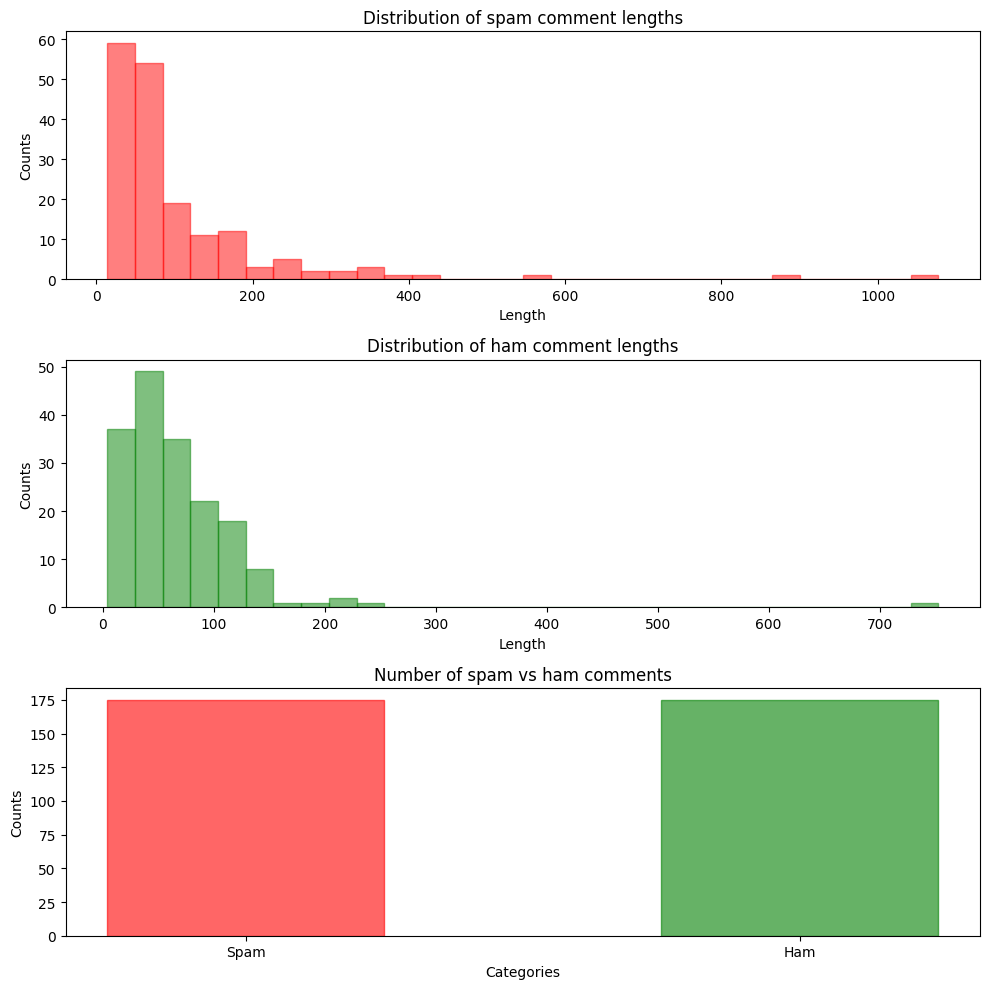

In [6]:
# Get lengths of all spam and ham comments
spam_lengths = raw_data.loc[raw_data["CLASS"]==1, "CONTENT"].str.len()
ham_lengths = raw_data.loc[raw_data["CLASS"]==0, "CONTENT"].str.len()

# Plot distribution of spam and ham lengths
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

ax[0].hist(spam_lengths, bins=30, color="red", edgecolor="red", alpha=0.5)
ax[0].set_title("Distribution of spam comment lengths")
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Counts")

ax[1].hist(ham_lengths, bins=30, color="green", edgecolor="green", alpha=0.5)
ax[1].set_title("Distribution of ham comment lengths")
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Counts")

ax[2].bar( x=1, height=(raw_data["CLASS"]==1).sum(), width =0.5, color='red', edgecolor="red", alpha=0.6, label="Spam")
ax[2].bar( x=2, height=(raw_data["CLASS"]==0).sum(), width =0.5, color='green', edgecolor="green", alpha=0.6, label="Ham")
ax[2].set_xticks([1, 2])
ax[2].set_xticklabels(['Spam', 'Ham'])
ax[2].set_title("Number of spam vs ham comments")
ax[2].set_xlabel("Categories")
ax[2].set_ylabel("Counts")

plt.tight_layout()
plt.show()

<h4 style="color:#874c62;">6. Analysis of <b>CONTENT</b> field.</h4>

<div style="background-color: rgba(120,120,200,0.25); padding: 10px;">
    <h5>Analysis of CONTENT<br></h5>
        <body>
            <ul>
                <li>
                    Based on a summary statistical analysis there aren't many features that distinguish between spam and ham comments.
                </li>
                <li>
                    Both spam and ham comments show similarly skewed distribution, with most of them having total character counts bounded between 0 - 200 characters. 
                </li>
                <li>
                    The longest spam message has more characters than the longest ham message, however, the statistical relevance of this is undecided.
                </li>
                <li>
                    It is not immediately clear if including content length as a feature will improve the performance of a classifier.
                </li>
                <li>
                    The data set is balanced with roughly the same number of spam and ham examples.
                </li>
            </ul>
    </body>
</div>

<h3 style="color:maroon;">B. Data preparation</h3>
<h4 style="color:teal;">(<b>Primary Contributor:</b> <u>Uday</u> | <b>Reviewer:</b> <u>Salma</u>)</h4>

<h4 style="color:#874c62;">1. Prepare new dataframe with only <b>CONTENT</b> and <b>CLASS</b> fields.</h4>

In [7]:
# Create new dataframe with appropriate fields
proc_data = raw_data[["CLASS","CONTENT"]].copy() # Use copy to supress slice warning (we want a copy not a slice referencing the memory location of raw_data)

In [8]:
# Inspect the dataframe
print(Colors.BLUE + "Shape of data frame:" + Colors.END)
print(proc_data.shape)
print("")

print(Colors.BLUE + "Data frame fields:" + Colors.END)
print(proc_data.columns)
print("")

print(Colors.BLUE + "Data frame info:" + Colors.END)
proc_data.info()
print("")

print(Colors.BLUE + "Unique entries per attribute:" + Colors.END)
print(proc_data.nunique())
print("")

print(Colors.BLUE + "Data frame head:" + Colors.END)
proc_data.head(3)

Shape of data frame:
(350, 2)

Data frame fields:
Index(['CLASS', 'CONTENT'], dtype='object')

Data frame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CLASS    350 non-null    int64 
 1   CONTENT  350 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.6+ KB

Unique entries per attribute:
CLASS        2
CONTENT    349
dtype: int64

Data frame head:


,CLASS,CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ..."
1,1,Hey guys check out my new channel and our firs...
2,1,just for test I have to say murdev.com


<h4 style="color:#874c62;">2. Convert text to lowercase.</h4>

In [9]:
proc_data["PROC_CONTENT"] = proc_data["CONTENT"].apply(lambda x: x.lower())

In [10]:
print(Colors.BLUE + "Data frame head:" + Colors.END)
proc_data.head(3)

Data frame head:


,CLASS,CONTENT,PROC_CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ...","huh, anyway check out this you[tube] channel: ..."
1,1,Hey guys check out my new channel and our firs...,hey guys check out my new channel and our firs...
2,1,just for test I have to say murdev.com,just for test i have to say murdev.com


<h4 style="color:#874c62;">3. Tokenize words.</h4>

In [11]:
proc_data["PROC_CONTENT"] = proc_data["PROC_CONTENT"].apply(lambda x: WordPunctTokenizer().tokenize(x))

In [12]:
print(Colors.BLUE + "Data frame head:" + Colors.END)
proc_data.head(3)

Data frame head:


,CLASS,CONTENT,PROC_CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ...","[huh, ,, anyway, check, out, this, you, [, tub..."
1,1,Hey guys check out my new channel and our firs...,"[hey, guys, check, out, my, new, channel, and,..."
2,1,just for test I have to say murdev.com,"[just, for, test, i, have, to, say, murdev, .,..."


<h4 style="color:#874c62;">4. Remove stop words.</h4>

In [13]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

proc_data["PROC_CONTENT"] = proc_data["PROC_CONTENT"].apply(remove_stopwords)

In [14]:
print(Colors.BLUE + "Data frame head:" + Colors.END)
proc_data.head(3)

Data frame head:


,CLASS,CONTENT,PROC_CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ...","[huh, ,, anyway, check, [, tube, ], channel, :..."
1,1,Hey guys check out my new channel and our firs...,"[hey, guys, check, new, channel, first, vid, u..."
2,1,just for test I have to say murdev.com,"[test, say, murdev, ., com]"


<h4 style="color:#874c62;">5. Remove non-alpha numeric characters.</h4>

In [15]:
def remove_punct(tokens):
    return [word for word in tokens if word.isalnum()]

proc_data["PROC_CONTENT"] = proc_data["PROC_CONTENT"].apply(remove_punct)

In [16]:
print(Colors.BLUE + "Data frame head:" + Colors.END)
proc_data.head(3)

Data frame head:


,CLASS,CONTENT,PROC_CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ...","[huh, anyway, check, tube, channel, kobyoshi02]"
1,1,Hey guys check out my new channel and our firs...,"[hey, guys, check, new, channel, first, vid, u..."
2,1,just for test I have to say murdev.com,"[test, say, murdev, com]"


<h4 style="color:#874c62;">6. Lemmatize words.</h4>

In [17]:
def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

proc_data["PROC_CONTENT"] = proc_data["PROC_CONTENT"].apply(lemmatize_words)

In [18]:
print(Colors.BLUE + "Data frame head:" + Colors.END)
proc_data.head(3)

Data frame head:


,CLASS,CONTENT,PROC_CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ...","[huh, anyway, check, tube, channel, kobyoshi02]"
1,1,Hey guys check out my new channel and our firs...,"[hey, guy, check, new, channel, first, vid, u,..."
2,1,just for test I have to say murdev.com,"[test, say, murdev, com]"


<h4 style="color:#874c62;">7. Re-assemble string post processing.</h4>

In [19]:
def join_words(tokens):
    return " ".join(tokens)

proc_data["PROC_CONTENT"] = proc_data["PROC_CONTENT"].apply(join_words)

In [20]:
print(Colors.BLUE + "Data frame head:" + Colors.END)
proc_data.head(3)

Data frame head:


,CLASS,CONTENT,PROC_CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ...",huh anyway check tube channel kobyoshi02
1,1,Hey guys check out my new channel and our firs...,hey guy check new channel first vid u monkey m...
2,1,just for test I have to say murdev.com,test say murdev com


<h3 style="color:white; background-color:#000000;padding: 10px;">Consolidate text preprocessing into a pipeline</h3>

In [21]:
# Text processing pipeline
def process_text (text):
    '''Process text for vectorization'''
    
    # Set up
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Process
    text = text.lower()
    text = WordPunctTokenizer().tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stop_words]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)

    # Return processed text
    return text

<h3 style="color:maroon;">C. Vectorization</h3>
<h4 style="color:teal;">(<b>Primary Contributor:</b> <u>Shahrier</u> | <b>Reviewer:</b> <u>Uday</u>)</h4>

<h4 style="color:#874c62;">1. Vectorize string with count vectorizer.</h4>

In [22]:
vectorizer = CountVectorizer()
bow_sparse_matrix = vectorizer.fit_transform(proc_data['PROC_CONTENT'])

In [23]:
print(Colors.BLUE + "Type of object returned by CountVectorizer().fit_transform:" + Colors.END)
print(type(bow_sparse_matrix))

print(Colors.BLUE + "Shape of sparse matrix returned by CountVectorizer().fit_transform:" + Colors.END)
print(bow_sparse_matrix.shape)

print(Colors.BLUE + "Density of sparse matrix returned by CountVectorizer().fit_transform:" + Colors.END)
print( bow_sparse_matrix.nnz / (bow_sparse_matrix.shape[0]*bow_sparse_matrix.shape[1]) )

print(Colors.BLUE + "Sum sparse matrix returned by CountVectorizer().fit_transform:" + Colors.END)
print( bow_sparse_matrix.toarray().sum() )

Type of object returned by CountVectorizer().fit_transform:
<class 'scipy.sparse._csr.csr_matrix'>
Shape of sparse matrix returned by CountVectorizer().fit_transform:
(350, 1229)
Density of sparse matrix returned by CountVectorizer().fit_transform:
0.006534929675694526
Sum sparse matrix returned by CountVectorizer().fit_transform:
3152


<h4 style="color:#874c62;">2. Downscaling with TF-IDF.</h4>

In [24]:
tfidf_transformer = TfidfTransformer()
tfidf_sparse_matrix = tfidf_transformer.fit_transform(bow_sparse_matrix)

In [25]:
print(Colors.BLUE + "Type of object returned by TfidTransformer().fit_transform:" + Colors.END)
print(type(tfidf_sparse_matrix))

print(Colors.BLUE + "Shape of sparse matrix returned by TfidTransformer().fit_transform:" + Colors.END)
print(tfidf_sparse_matrix.shape)

print(Colors.BLUE + "Density of sparse matrix returned by TfidTransformer().fit_transform:" + Colors.END)
print( tfidf_sparse_matrix.nnz / (tfidf_sparse_matrix.shape[0]*tfidf_sparse_matrix.shape[1]) )

print(Colors.BLUE + "Sum sparse matrix returned by TfidTransformer().fit_transform:" + Colors.END)
print( tfidf_sparse_matrix.toarray().sum() )

Type of object returned by TfidTransformer().fit_transform:
<class 'scipy.sparse._csr.csr_matrix'>
Shape of sparse matrix returned by TfidTransformer().fit_transform:
(350, 1229)
Density of sparse matrix returned by TfidTransformer().fit_transform:
0.006534929675694526
Sum sparse matrix returned by TfidTransformer().fit_transform:
881.1320986498287


<h4 style="color:#874c62;">3. Create the feature matrix.</h4>

In [26]:
feature_names = vectorizer.get_feature_names_out();
tfidf_df = pd.DataFrame(tfidf_sparse_matrix.toarray(), columns=feature_names)
feat_mat = pd.concat([proc_data["CLASS"],tfidf_df], axis = 1)

In [27]:
print(Colors.BLUE + "Shape of feature matrix:" + Colors.END)
print( feat_mat.shape )

print(Colors.BLUE + "Head of feature matrix:" + Colors.END)
print( feat_mat.head(3) )

Shape of feature matrix:
(350, 1230)
Head of feature matrix:
   CLASS   00  000   02  034   05   08   10  100  100000415527985  ...   yt  \
0      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              0.0  ...  0.0   
1      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              0.0  ...  0.0   
2      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              0.0  ...  0.0   

   zero  zombie  zxlightsoutxz  강남스타일  ｃｏｍｍｅｎｔ  ｄａｍｎ  ｆａｎｃy   ｉｓ  ｔｈｉｓ  
0   0.0     0.0            0.0    0.0      0.0   0.0    0.0  0.0   0.0  
1   0.0     0.0            0.0    0.0      0.0   0.0    0.0  0.0   0.0  
2   0.0     0.0            0.0    0.0      0.0   0.0    0.0  0.0   0.0  

[3 rows x 1230 columns]


<h4 style="color:#874c62;">4. Shuffle the data.</h4>

In [28]:
shuffled_feat_mat = feat_mat.sample(frac=1, random_state=1)

In [29]:
print(Colors.BLUE + "Shape of shuffled feature matrix:" + Colors.END)
print( shuffled_feat_mat.shape )
print("")

print(Colors.BLUE + "Head of shuffled feature matrix:" + Colors.END)
print( shuffled_feat_mat.head(3) )
print("")

Shape of shuffled feature matrix:
(350, 1230)

Head of shuffled feature matrix:
     CLASS   00  000   02  034   05   08   10  100  100000415527985  ...   yt  \
192      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              0.0  ...  0.0   
256      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              0.0  ...  0.0   
169      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0              0.0  ...  0.0   

     zero  zombie  zxlightsoutxz     강남스타일  ｃｏｍｍｅｎｔ  ｄａｍｎ  ｆａｎｃy   ｉｓ  ｔｈｉｓ  
192   0.0     0.0            0.0  0.000000      0.0   0.0    0.0  0.0   0.0  
256   0.0     0.0            0.0  0.000000      0.0   0.0    0.0  0.0   0.0  
169   0.0     0.0            0.0  0.280504      0.0   0.0    0.0  0.0   0.0  

[3 rows x 1230 columns]



<h4 style="color:#874c62;">5. Analysis.</h4>

<div style="background-color: rgba(120,120,200,0.25); padding: 10px;">
    <h5>Analysis of BOW vs TF-IDF transforms<br></h5>
    <body>
        <table>
            <tr>
                <th>S No</th> <th>Matrix</th> <th>Rows</th> <th>Columns</th> <th>Sum of elements</th> <th>Density</th>
            </tr>
            <tr>
                <td>1</td> <td>Original</td> <td>350</td> <td>2</td> <td>Not specified</td> <td>1</td>
            </tr>
                <td>2</td> <td>Count vectorizer sparse</td> <td>350</td> <td>1229</td> <td>3152</td> <td>0.0065</td>
            <tr>
            <tr>
                <td>3</td> <td>TF-IDF sparse</td> <td>350</td> <td>1229</td> <td>881.132</td> <td>0.0065</td>
            </tr>
        </table> 
        We observe that:
        <ul>
            <li>When the data is vectorized, the number of columns increases to the number of unique words in the corpus.</li>
            <li>The density of sparse matrices are low, i.e. most of the matrix elements are 0.</li>
            <li>As expected, the sparse matrices from Count Vectorizer and TF-IDF have the same number of columns and the same density.</li>
            <li>The sum of all the elements in the sparse matrix corresponding to TF-IDF is lower than the sum of all the elements in the sparse matrix of Count Vectorizer. This is because TF-IDF downscales the values.</li>
        </ul>
    </body>
</div>

<h3 style="color:maroon;">D. Model building</h3>
<h4 style="color:teal;">(<b>Primary Contributor:</b> <u>Ibrahem</u> | <b>Reviewer:</b> <u>Uday</u>)</h4>

<h4 style="color:#874c62;">1. Make a 75-25 train test split without using train_test_split.</h4>

In [30]:
# Determine indices
split_index = int( 0.75 * len(shuffled_feat_mat) )

# Allocate data according to indices
train_data = shuffled_feat_mat[:split_index]
test_data = shuffled_feat_mat[split_index:]

# Separate classes from features for each data set
x_train = train_data.drop(columns = ["CLASS"])
y_train = train_data["CLASS"]

x_test = test_data.drop(columns = ["CLASS"])
y_test = test_data["CLASS"]

In [31]:
print(Colors.BLUE + "Split index:" + Colors.END)
print( split_index )
print("")

print(Colors.BLUE + "Shape of x_train:" + Colors.END)
print( x_train.shape )
print("")

print(Colors.BLUE + "Shape of y_train:" + Colors.END)
print( y_train.shape )
print("")

print(Colors.BLUE + "Shape of x_test:" + Colors.END)
print( x_test.shape )
print("")

print(Colors.BLUE + "Shape of y_test:" + Colors.END)
print( y_test.shape )
print("")

Split index:
262

Shape of x_train:
(262, 1229)

Shape of y_train:
(262,)

Shape of x_test:
(88, 1229)

Shape of y_test:
(88,)



<h4 style="color:#874c62;">2. Fit multinomial Naive-Bayes.</h4>

In [32]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

<h4 style="color:#874c62;">3. Cross validation.</h4>

In [33]:
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5)

In [34]:
# Print the cross-validation sc0ores
print(Colors.BLUE + "Cross-validation scores:" + Colors.END, cross_val_scores)
print(Colors.BLUE + "Mean accuracy:" + Colors.END, cross_val_scores.mean())
print(Colors.BLUE + "Standard deviation:" + Colors.END, cross_val_scores.std())

Cross-validation scores: [0.90566038 0.98113208 0.92307692 0.94230769 0.92307692]
Mean accuracy: 0.9350507982583455
Standard deviation: 0.02579414986096068


<h4 style="color:#874c62;">4. Test model, print accuracy and confusion matrix.</h4>

In [35]:
# Predict on the test set
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(Colors.BLUE + 'Accuracy: ' + Colors.END, accuracy)

#Print confusion matrix
print(Colors.BLUE + "Confusion Matrix:" +Colors.END)
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.9545454545454546
Confusion Matrix:
[[41  1]
 [ 3 43]]


In [36]:
# Display classification report
print(Colors.BLUE + "Classification Report:" + Colors.END)
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.98      0.93      0.96        46

    accuracy                           0.95        88
   macro avg       0.95      0.96      0.95        88
weighted avg       0.96      0.95      0.95        88



<h4 style="color:#874c62;">5. Analysis of model metrics.</h4>

<div style="background-color: rgba(120,120,200,0.25); padding: 10px;">
    <h5>Analysis of model metrics<br></h5>
    <body>
        <table>
            <h5>Confusion matrix:<br></h5>
            <tr>
                <th>Class</th> <th>0</th> <th>1</th>
            </tr>
            <tr>
                <td>0</td> <td>43</td> <td>1</td>
            </tr>
                <td>1</td> <td>3</td> <td>43</td>
            <tr>
        </table> 
        We observe that:
        <ul>
            <li>The model accurately classifies 41 and 43 of the comments as spam and not spam, respectively. i.e. It is a good predictor of true positives and true negatives.</li>
            <li>The precision (TP/(TP+FP)) of the model is 0.97.</li>
            <li>The recall (TP/(TP+FN)) of the model is 0.93.</li>
            <li>The ovarall accuracy of the model is 0.95.</li>
            <li>This indicates that the model is performing well, with 1 false positives. Ideally, having low false positives will mitigate the risk to removing important comments.</li>
        </ul>
    </body>
</div>

<h4 style="color:#874c62;">6. Add 6 new comments and classify them.</h4>

In [37]:
# Create new comments for prediction
comment_array = np.array([["This is video is amazing."],
                          ["Shop now at amazon.com"],
                          ["Lol. What a joke!"],
                          ["Ha, this is so funny!"],
                          ["Quick fix to all your problems. Click the link now!"],
                          ["This movie is amazing! Highly recommended."],
                          ["The customer support was exceptional. Great service!"],
                          ["I found the tutorial very helpful. Thank you!"],
                          ["Click the link to win a free iPhone!"],
                          ["Get rich quick with this investment scheme!"],
                          ["The video is well shot"]])
column_name = ["CONTENT"]
comment_df = pd.DataFrame(comment_array, columns=column_name)

# Process dataframe
comment_df_proc = comment_df.copy()
comment_df_proc["CONTENT"] = comment_df["CONTENT"].apply(process_text)

# Vectorize dataframe
bow_sparse_matrix = vectorizer.transform(comment_df_proc['CONTENT'])
tfidf_sparse_matrix = tfidf_transformer.transform(bow_sparse_matrix)
print(tfidf_sparse_matrix.shape)

feature_names = vectorizer.get_feature_names_out();
tfidf_df = pd.DataFrame(tfidf_sparse_matrix.toarray(), columns=feature_names)
print(tfidf_df.shape)

# Make prediction
prediction = clf.predict(tfidf_df)
prediction_df = pd.DataFrame(prediction, columns=["Prediction"])
# Concat prediction to dataframe and print
classifier_comments = pd.concat([comment_df, prediction_df], axis=1)
classifier_comments.head(12)

(11, 1229)
(11, 1229)


,CONTENT,Prediction
0,This is video is amazing.,0
1,Shop now at amazon.com,1
2,Lol. What a joke!,0
3,"Ha, this is so funny!",0
4,Quick fix to all your problems. Click the link...,1
5,This movie is amazing! Highly recommended.,1
6,The customer support was exceptional. Great se...,0
7,I found the tutorial very helpful. Thank you!,0
8,Click the link to win a free iPhone!,1
9,Get rich quick with this investment scheme!,0


<h4 style="color:#874c62;">7. Analysis of spam classification of new comments.</h4>

<div style="background-color: rgba(120,120,200,0.25); padding: 10px;">
    <h5>Analysis of spam classification of new comments<br></h5>
    <body>
        <ul>
            <li>The model correctly classifies 8 out of the 10 new comments fed to it.</li>
            <li>The model accuracy in this test case is 0.80.</li>
            <li>This lower than the accuracy obtained with the original test set (0.95).</li>
            <li>However, because the the number of new comments is small (10) it's difficult to say if the difference in accuracies is statistically relevant.</li>
        </ul>
    </body>
</div>

<h3 style="color:maroon;">Report</h3>

<div style="background-color:rgba(95, 158, 160, 0.3);padding: 10px;">
<h3 style="text-align: center;"><b>Report</b></h3>
<body>
    <h4 style="text-align: center;"><b>Introduction</b></h4>
    <p>
        Natural Language Processing (NLP) is an essential tool to extract valuable insights from unstructured text data. This report covers data preparation, data transformation, and model building utilizing the Naive-Bayes algorithm. Python’s versatile libraries such as the nltk (natural language toolkit), pandas, and sklearn make it a prime candidate for the model building process. Throughout this exploration, key concepts such as tokenization, stop word removal, lemmatization, and vectorization will be employed to refine the dataset and optimize the model. With practical demonstration through the jupyter notebook, readers can gain a thorough understanding of NLP with the Naive-Bayes classifier.
    </p>
    <h4 style="text-align: center;"><b>Methodology</b></h4>  
    <ol>
        <li>Scikit learn and nltk were used to build a spam classifier.</li>
        <li>Classified comments from youtube were used to train the model.</li>
        <li>
            The text was preprocessed in the following sequence:
            <ol>
                <li> All text was converted to lower case.</li>
                <li>The text was then tokenized.</li>
                <li>Non-alphanumeric characters and stop words were removed from the tokenized text.</li>
                <li>The tokens were lemmatized.</li>
                <li>The processed tokens were converted back into a string</li>
            </ol>
        </li>
        <li>
            Text processing was followed by vectorization:
            <ol>
                <li>The text was vectorized using count vectorizer.</li>
                <li>The vectors were transformed with TF-IDF to reflect the significance of each word in the document.</li>
            </ol>
        </li>
        <li>The vectorized text was split into a training and test set (training:test = 0.75:0.25).</li>
        <li>The training set was fit to a multinomial Naive-Bayes classifier.</li>
        <li>The model was cross validated and it's accuracy was determined using the test set.</li>
        <li>Finally, the trained model was used to classify new(unseen) comments and its performance was evaluated.</li>
    </ol>
    <h4 style="text-align: center;"><b>Analysis</b></h4>
    <p>
        <h5><u>Analysis of raw data frame</u><br></h5>
            <ul>
                <li>The data set contains 350 entries and 5 attributes.</li>
                <li>None of the fields in the data set are empty.</li>
                <li>Fields,<b>COMMENT_ID, AUTHOR, DATE</b> contain mostly unique values, hence they will be ignored in classifying the <b>CONTENT</b> class.</li>
            </ul>
    </p>
    <h5><u>Analysis of CONTENT</u></h5>
    <p>
        <ul>
                <li>
                    Based on a summary statistical analysis there aren't many features that distinguish between spam and ham comments.
                </li>
                <li>
                    Both spam and ham comments show similarly skewed distribution, with most of them having total character counts bounded between 0 - 200 characters. 
                </li>
                <li>
                    The longest spam message has more characters than the longest ham message, however, the statistical relevance of this is undecided.
                </li>
                <li>
                    It is not immediately clear if including content length as a feature will improve the performance of a classifier.
                </li>
                <li>
                    The data set is balanced with roughly the same number of spam and ham examples.
                </li>
            </ul>
    </p>
    <p>
        <h5><u>Analysis of BOW vs TF-IDF transforms</u></h5>
        <table>
            <tr>
                <th>S No</th> <th>Matrix</th> <th>Rows</th> <th>Columns</th> <th>Sum of elements</th> <th>Density</th>
            </tr>
            <tr>
                <td>1</td> <td>Original</td> <td>350</td> <td>2</td> <td>Not specified</td> <td>1</td>
            </tr>
                <td>2</td> <td>Count vectorizer sparse</td> <td>350</td> <td>1229</td> <td>3152</td> <td>0.0065</td>
            <tr>
            <tr>
                <td>3</td> <td>TF-IDF sparse</td> <td>350</td> <td>1229</td> <td>881.132</td> <td>0.0065</td>
            </tr>
        </table> 
        We observe that:
        <ul>
            <li>When the data is vectorized, the number of columns increases to the number of unique words in the corpus.</li>
            <li>The density of sparse matrices are low, i.e. most of the matrix elements are 0.</li>
            <li>As expected, the sparse matrices from Count Vectorizer and TF-IDF have the same number of columns and the same density.</li>
            <li>The sum of all the elements in the sparse matrix corresponding to TF-IDF is lower than the sum of all the elements in the sparse matrix of Count Vectorizer. This is because TF-IDF downscales the values.</li>
        </ul>
    </p>
    <p>
            <h5><u>Analysis of model metrics</u></h5>
        <table>
            <h5>Confusion matrix:<br></h5>
            <tr>
                <th>Class</th> <th>0</th> <th>1</th>
            </tr>
            <tr>
                <td>0</td> <td>43</td> <td>1</td>
            </tr>
                <td>1</td> <td>3</td> <td>43</td>
            <tr>
        </table> 
        We observe that:
        <ul>
            <li>The model accurately classifies 41 and 43 of the comments as spam and not spam, respectively. i.e. It is a good predictor of true positives and true negatives.</li>
            <li>The precision (TP/(TP+FP)) of the model is 0.97.</li>
            <li>The recall (TP/(TP+FN)) of the model is 0.93.</li>
            <li>The ovarall accuracy of the model is 0.95.</li>
            <li>This indicates that the model is performing well, with 1 false positives. Ideally, having low false positives will mitigate the risk to removing important comments.</li>
        </ul>
    </p>
    <p>
        <h5><u>Analysis of spam classification of new comments</u></h5>
        <ul>
            <li>The model correctly classifies 8 out of the 10 new comments fed to it.</li>
            <li>The model accuracy in this test case is 0.80.</li>
            <li>This lower than the accuracy obtained with the original test set (0.95).</li>
            <li>However, because the the number of new comments is small (10) it's difficult to say if the difference in accuracies is statistically relevant.</li>
        </ul>
    </p>
    <p>
    <h4 style="text-align: center;"><b>Conclusion</b></h4>
    Using NLTK ans Scikit learn  we were able to build and train a model that is able to accurately distinguish between spam and ham comments.
    </p>
    <p>
    <h4 style="text-align: center;"><b>Future Work</b></h4>
    <ul>
        <li>Retest model with larger training and testing sets for statistical relevancy.</li>
        <li>Understanding the impacts of stemming vs lemmatizing on model accuracy.</li>
        <li>Compare the Naive-Bayes classifier against other models (eg. ANN) and evaluation performance metrics and computational cost.</li>
    </ul>
    </p>
    
</body>
</div>